# Проект для "Метанпромбанка"

Региональный банк "Метапромбанк" столкнулся с оттоком клиентов. Необходимо проанализировать данные о клиентах, выявить признаки, оказывающим значительное влияние на отток клиентов, выделить клиентские сегменты и составить таргетированные рекомендации по работе с сегментами с наиболее высоким риском оттока. 

Таким образом, работа над проектов подразумевает следущие этапы: 

- Загрузка, описание и обработка данных: 

    - В рамках этапа будут импортированы необходимые библиотеки, будет проведено первичное ознакомление с данными, проведена работа по поиску, классификации и отработке пропусков, поиск явных и неявных дубликатов и кодирование некоторых признаков для дальнейшей работы. 

- Исследовательский анализ данных:
    - В ходе исследовательского анализа планируется исследовать распределение непрервывных, категориальных и дискретных признаков для выявления интервалов оттока по непрервыным данным и поиска значений  категориальных и дискретных признаков с  высокими показателями оттока. Также в рамках этапа будет проведен корреляционный анализ, результаты которого будут интерпретированы.
    
- Формирование и проверка статистических гипотез:
    - Этот шаг подразумевает выдвижение гипотез на основе изученных данных и их проверку с использованием статистических инструментов. 
    
- Подведение промежуточных выводов:
    - Этап включает в себя формирование промежуточных заключений, к которым привело проведенное исследование. Будут приведены результаты исследовательского анализа, корреляционного анализа и проверки гипотез. 
    
- Сегментация пользователей: 
    - На этом этапе будут выделены сегменты, состоящие из клиентов банка с показателями оттока выше среднего, объединенные в группы по принципу наличия признаков повышенной отточности.
    
- Приоритизация сегментов: 
    - Шаг предполагает расстановку приоритетов между выделенными сегментами, для определения порядка их отработки отделом маркетинга.
    
- Формирование итоговых выводов и таргетированных рекомендаций

## Загрузка, описание и обработка данных

### Импорт необходимых библиотек

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{: .2f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import warnings
warnings.filterwarnings("ignore")

### Загрузка данных и первичное ознакомление

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
data.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


Приведем названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower() 

In [5]:
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Работа с пропусками

Обнаружилось 26 пропусков в столбце age и 2295 пропусков в столбце balance.

Количество пропусков в столбце age не слишком существенно, можно их удалить. 

In [7]:
data = data.dropna(subset=['age'])

Изменим типы данных на подходящие, поскольку баллы скоринга и возраст - целочисленные значения и пропуски в возрасте больше не мешают это сделать

In [8]:
data['score'] = data['score'].astype('int') 

In [9]:
data['age'] = data['age'].astype('int')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 935.1+ KB


Однако в столбце c балансом пропусков значительно больше и необходимо установить их тип в рамках классификации пропусков. Для этого необходимо создать признак, который отражал бы наличие или отсутствие значения в столбце balance и построить матрицу корреляций с другими признаками.

Создадим новый признак

In [11]:
def missing_balance(row):
    if row['balance'] >= 0:
        return 0
    else:
        return 1
    
data['missing_balance'] = data.apply(missing_balance, axis=1)

Проверим результат

In [12]:
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0


Для построения матрицы корреляций необходимо также закодировать категориальные переменные - город и пол

In [13]:
data['user_city'] = data['city']
data['user_gender'] = data['gender']
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,user_city,user_gender
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,Ярославль,Ж
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,Ярославль,М


In [14]:
data = pd.get_dummies(data, columns=['user_city'])
data = pd.get_dummies(data, columns=['user_gender'])

In [15]:
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,user_city_Ростов,user_city_Рыбинск,user_city_Ярославль,user_gender_Ж,user_gender_М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,False,True,False,True,False
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,False,True,False,True,False
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,False,True,False,True,False
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,False,False,True,True,False
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,False,False,True,False,True


Построим корреляцонную матрицу

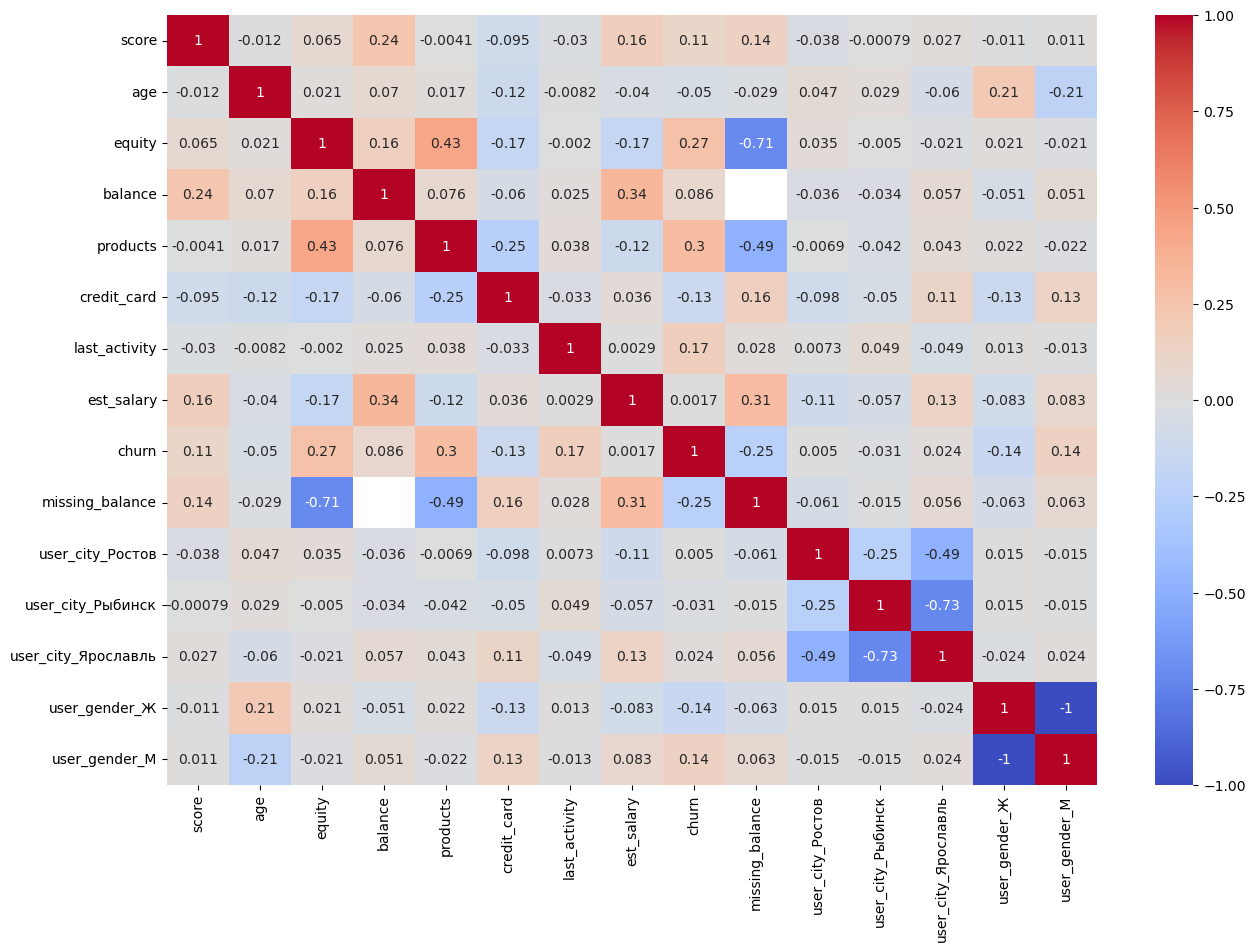

In [16]:
corr_1 = data.drop(['userid', 'city', 'gender'], axis=1).corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_1, cmap='coolwarm', center=0, annot=True)

Исходя из матрицы корреляций, можно сделать вывод, что пропущенные значения в балансе не имеют заметной корреляции с другими признаками, по шкале корреляции Чеддока. В случае с количество продуктов и баллами собственности корреляция имеет обратную зависимость. Можно сделать вывод, что пропуски в столбце balance относятся к Missing Completely At Random, однако их число слишком велико, чтобы отбросить.

Удалим столбец-признак отсутствия баланса за отсутствием дальнейшей необходимости

In [17]:
data = data.drop('missing_balance', axis=1)
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,user_city_Ростов,user_city_Рыбинск,user_city_Ярославль,user_gender_Ж,user_gender_М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,False,True,False,True,False
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,False,True,False,True,False
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,False,True,False,True,False
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,False,False,True,True,False
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,False,True,False,False,True
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,False,False,True,False,True
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,False,False,True,False,True
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,False,False,True,True,False


### Поиск дубликатов

Займемся поиском явных дубликатов

In [18]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Изучим датасет на предмет неявных дубликатов - вероятнее всего они могут возникнуть в столбце userid

In [19]:
data['userid'].duplicated(keep=False).sum()

100

In [20]:
userid_duplicates = data.loc[data['userid'].duplicated(keep=False)]
userid_duplicates.sort_values(by='userid').head(20)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,user_city_Ростов,user_city_Рыбинск,user_city_Ярославль,user_gender_Ж,user_gender_М
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,False,True,False,True,False
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,False,False,True,True,False
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,False,True,False,True,False
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,False,False,True,True,False
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,False,True,False,True,False
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,False,False,True,False,True
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,False,False,True,True,False
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,False,True,False,False,True
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,False,True,False,True,False
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,False,False,True,True,False


Из увиденного можно сделать вывод, что одинаковые id встречаются у клиентов из разных городов, следовательно отбрасывать их не стоит.

### Промежуточный вывод

В рамках первого этапа работы над проектом были импортированы необходимые библиотеки и сформировано первичное представление об имеющемся датасете. 

Названия столбцов были приведены к единому образцу, 

Данные в столбцах score и age приведены к целочисленным значениям, 

Города и пол клиентов были закодированы для дальнейшего расчета корреляции 

Была проведена работа по поиску и отработке пропусков. В столбцах age и balance обнаружилось 26 и 2295, было установлено, что пропуски носят случайный характер и не связаны с другими данными - было принято решение исключить их из датасета. 

Также данные были проверен на предмет наличия явных и неявных дубликатов. Было найдено 100 дубликатов по userid - оказалось, что одинаковые id встречаются у пользователей из разных городов, следовательно они не могут быть исключены из набора данных

## Исследовательский анализ данных

### Поиск интервалов оттока по непрерывным переменным

#### Распределение оттока клиентов по очкам скоринга

Text(0, 0.5, 'Частота встречаемости')

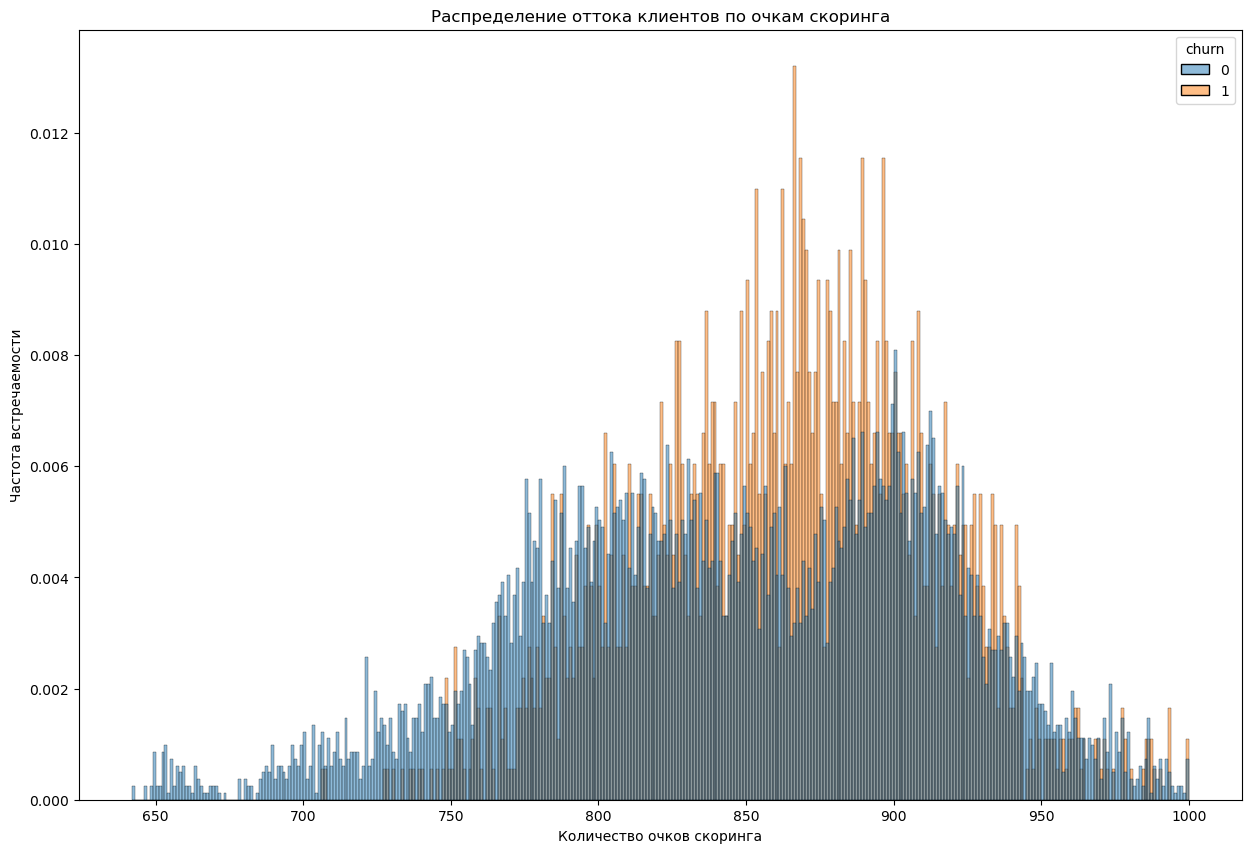

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=data, x='score', hue='churn', stat="density", common_norm=False, binwidth=1)
plt.title('Распределение оттока клиентов по очкам скоринга')
plt.xlabel('Количество очков скоринга')
plt.ylabel('Частота встречаемости')

По графику можно сделать вывод, что большое число оттоков зафиксировано среди пользователей с показателями очков скоринга в диапазоне от 830 до 940. 

#### Распределение оттока клиентов по возрасту

Text(0, 0.5, 'Частота встречаемости')

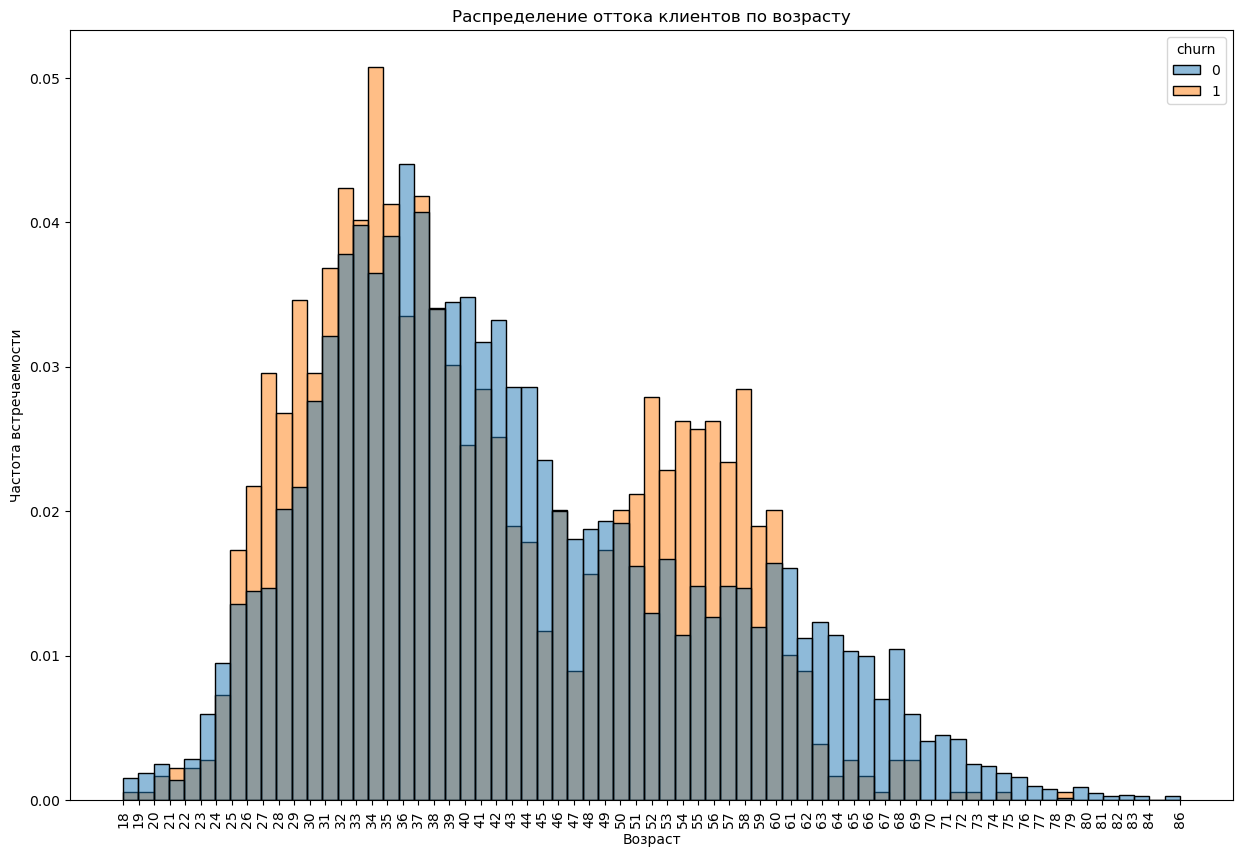

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=data, x='age', hue='churn', stat="density", common_norm=False, 
                  bins=(data['age'].max() - data['age'].min()+1))
plt.title('Распределение оттока клиентов по возрасту')
plt.xlabel('Возраст')
plt.xticks(data['age'].unique(), rotation=90)
plt.ylabel('Частота встречаемости')

На графике видно, что отток клиентов имеет два пика ориентирочно в диапазоне от 25 до 35 лет и от 50 до 60

#### Распределение оттока клиентов по баллам собственности

Text(0, 0.5, 'Частота встречаемости')

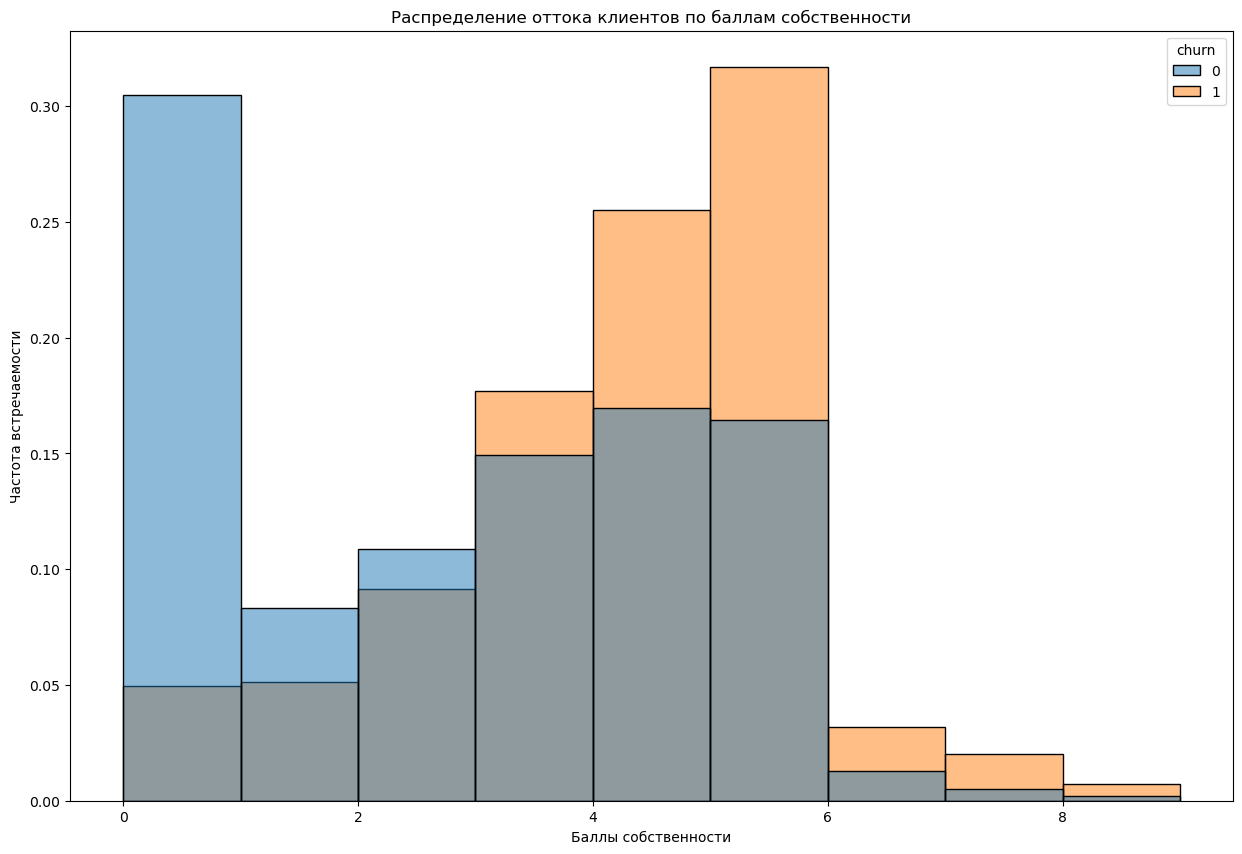

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=data, x='equity', hue='churn',stat="density", common_norm=False, binwidth=1)
plt.title('Распределение оттока клиентов по баллам собственности')
plt.xlabel('Баллы собственности')
plt.ylabel('Частота встречаемости')

Согласно графику, в наибольшей степени отток характерен для пользователей имеющих от 4 и более баллов собственности

#### Распределение оттока клиентов по балансу

Text(0, 0.5, 'Частота встречаемости')

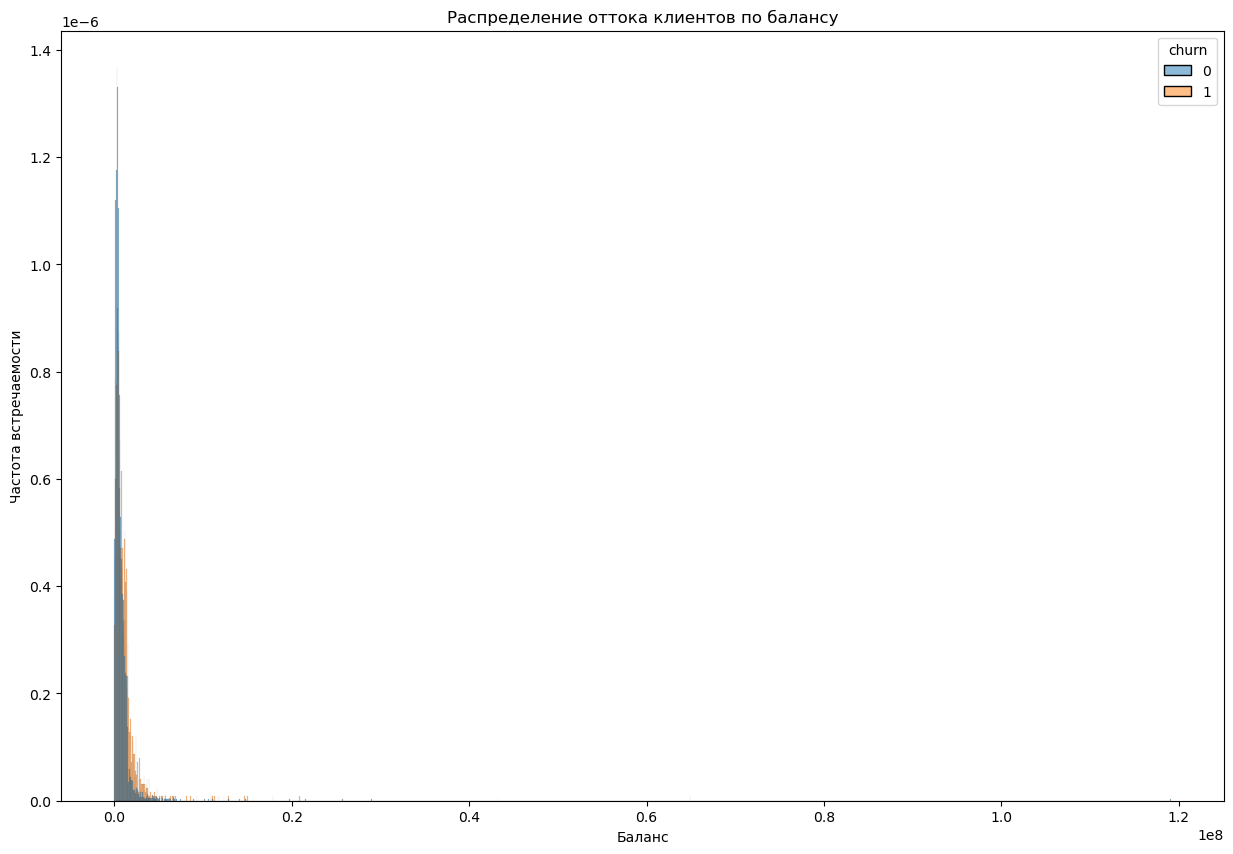

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=data, hue='churn', x='balance', stat="density", common_norm=False)
plt.title('Распределение оттока клиентов по балансу')
plt.xlabel('Баланс')
plt.ylabel('Частота встречаемости')

У гистограммы баланса имеется длинный хвост за счет аномально высоких значений. Для исследования признака необходимо его отсечь. Подсчитаем вернхний предел нормальных значений и через Q3 + 1.5 IQR .

Построим диаграмму размаха для изучения результатов

count         7695.00
mean        827245.59
std        1980327.41
min              0.00
25%         295698.71
50%         524295.33
75%         980051.21
max      119113552.01
Name: balance, dtype: object

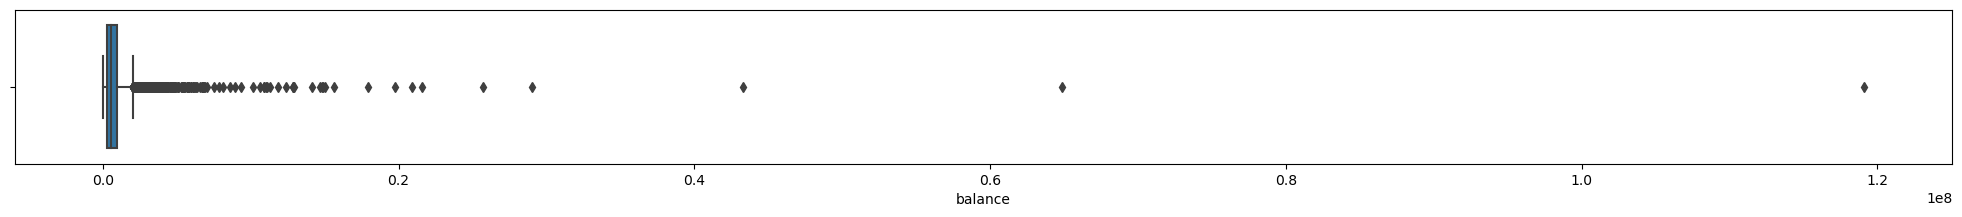

In [27]:
fig, ax = plt.subplots(figsize=(25,2))
sns.boxplot(x=data['balance'])
data['balance'].describe().apply(lambda x: format(x, '0.2f'))

In [30]:
balance_upper_threshold = 980051.21 + ((980051.21 - 295698.71)*1.5)

In [72]:
balance = data.query('balance <= @balance_upper_threshold')

Построим диаграмму на обновленных данных

Text(0, 0.5, 'Частота встречаемости')

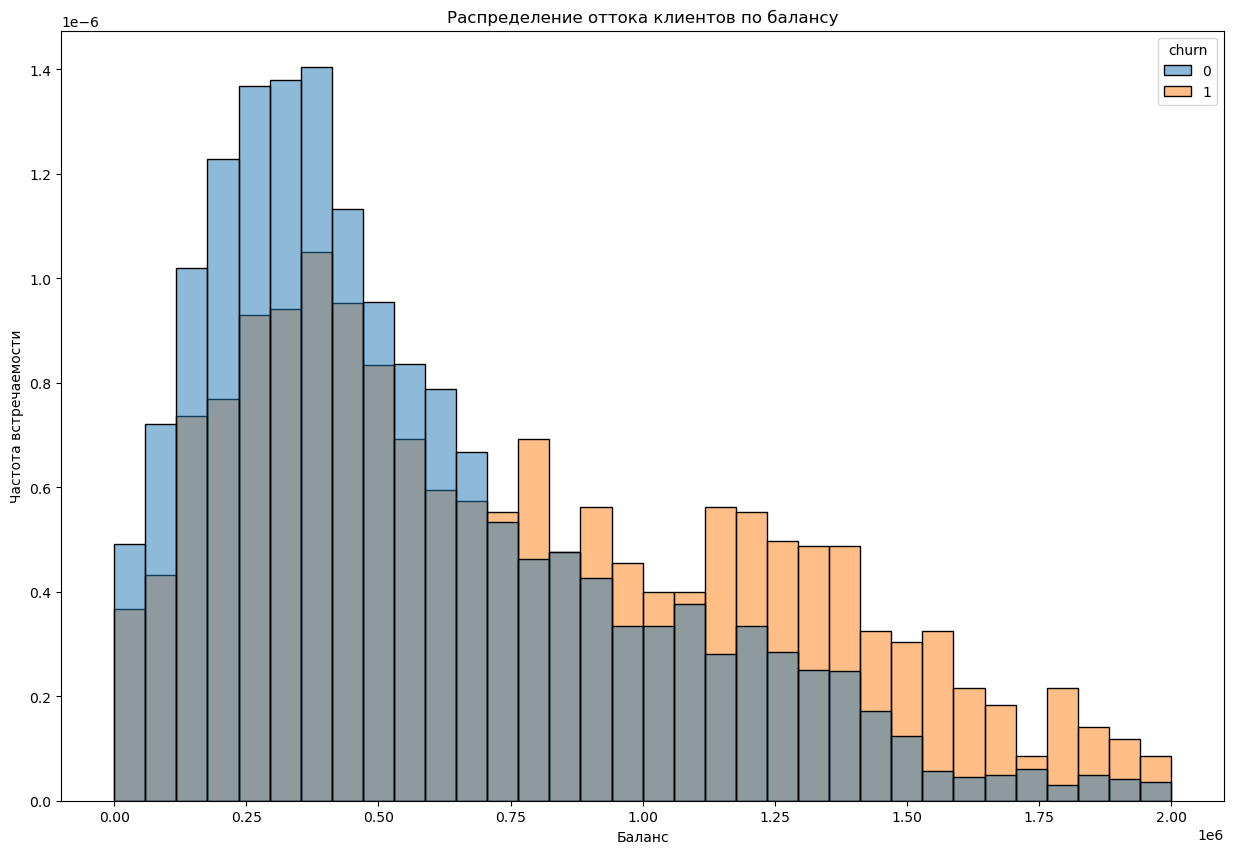

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=balance, hue='churn', x='balance', stat="density", common_norm=False)
plt.title('Распределение оттока клиентов по балансу')
plt.xlabel('Баланс')
plt.ylabel('Частота встречаемости')

Из графика видно, что число отточных клиентов превышает число лояльных в диапазоне от 750 тыс. до 2 млн.

#### Распределение оттока клиентов по оценочному доходу

Text(0, 0.5, 'Частота встречаемости')

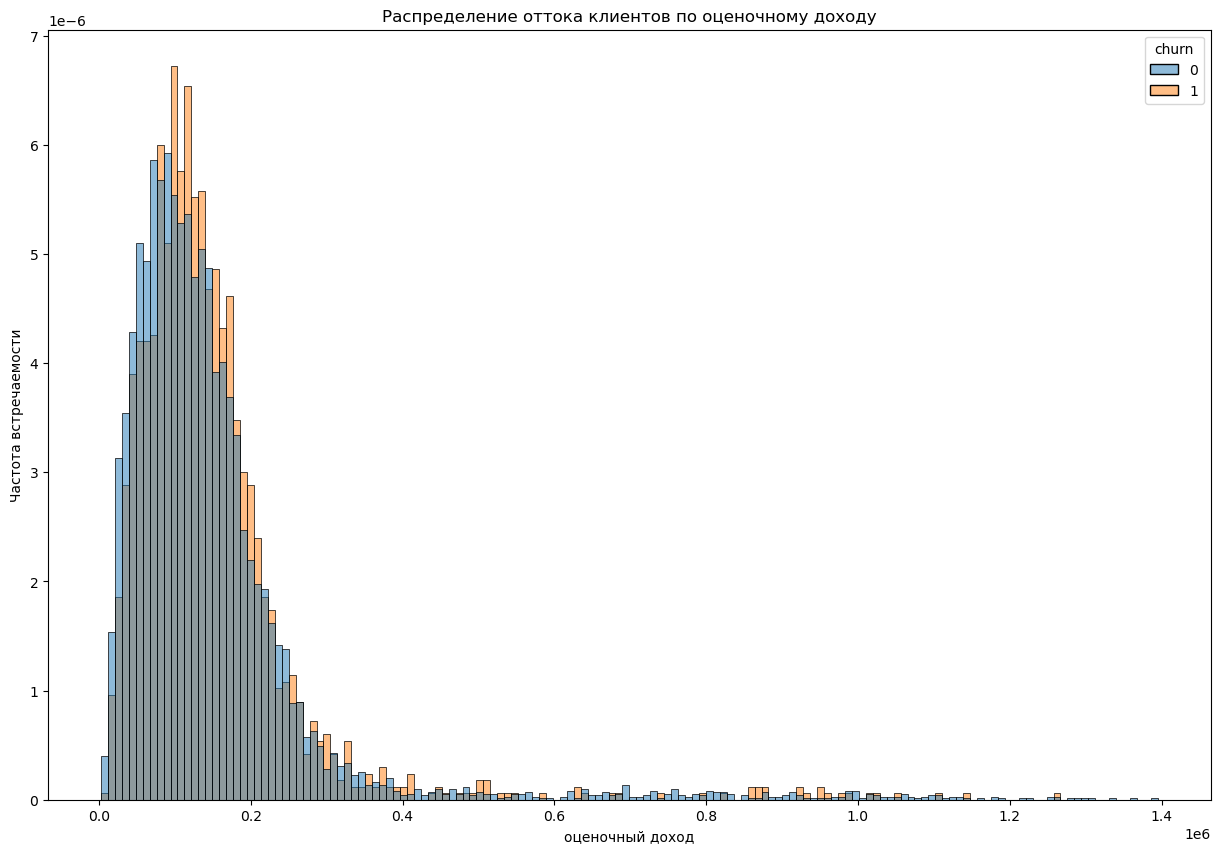

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=data, x='est_salary', hue='churn', stat="density", common_norm=False)
plt.title('Распределение оттока клиентов по оценочному доходу')
plt.xlabel('оценочный доход')
plt.ylabel('Частота встречаемости')

Аналогично избавимся от хвоста среди значений оценочного дохода

In [35]:
est_salary_95 = round(np.percentile(data['est_salary'], 95), 2)
est_salary_95 

316360.58

In [36]:
data=data.query('est_salary <= @est_salary_95 ')

count      9475.00
mean     122952.33
std       64503.94
min        2546.30
25%       73033.38
50%      115228.31
75%      164596.79
max      316316.10
Name: est_salary, dtype: object

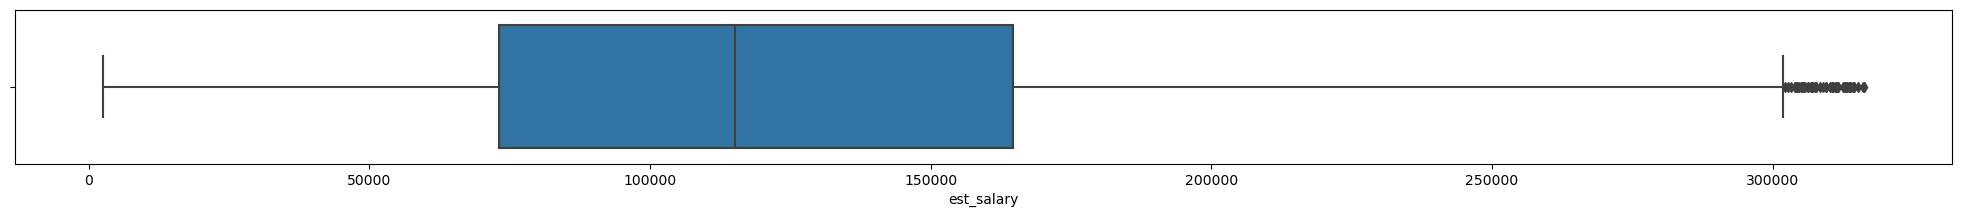

In [37]:
fig, ax = plt.subplots(figsize=(25,2))
sns.boxplot(x=data['est_salary'])
data['est_salary'].describe().apply(lambda x: format(x, '0.2f'))

Text(0, 0.5, 'Частота встречаемости')

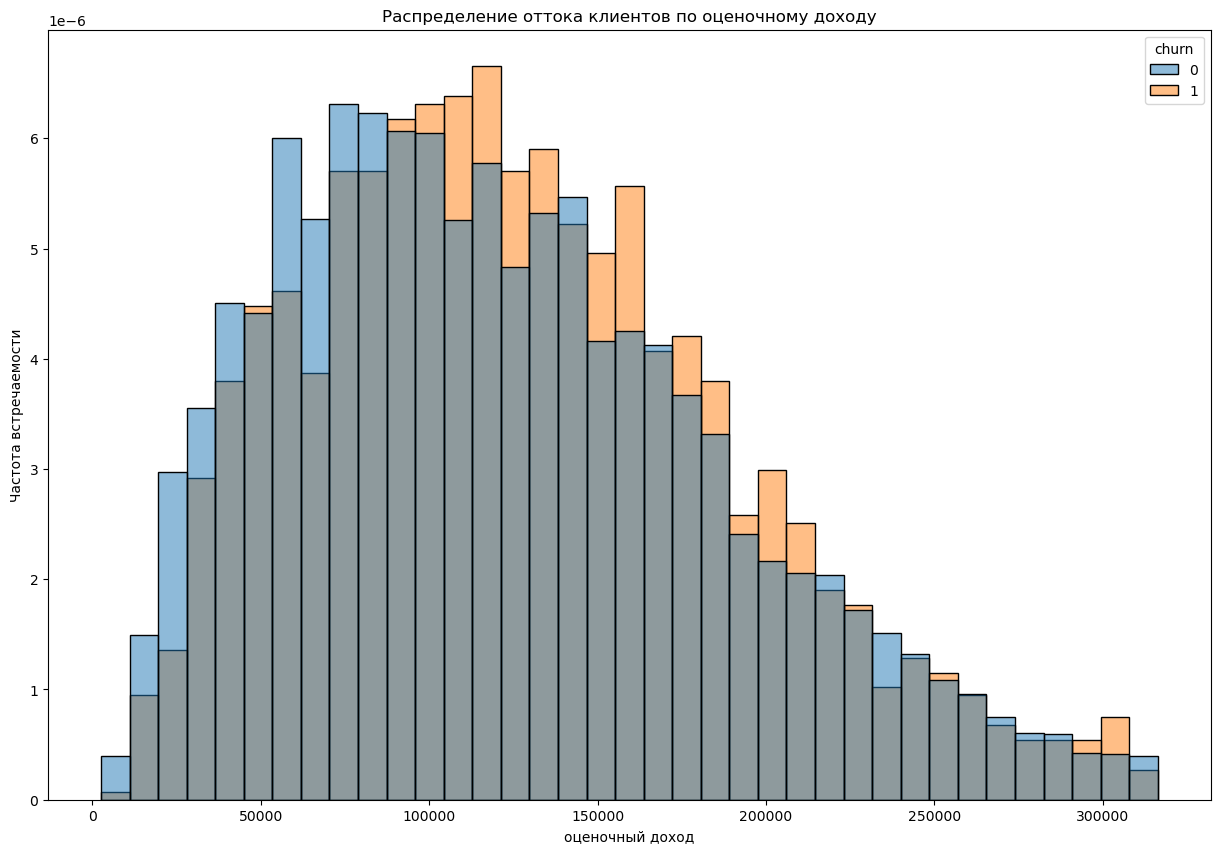

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=data, x='est_salary', hue='churn', stat="density", common_norm=False)
plt.title('Распределение оттока клиентов по оценочному доходу')
plt.xlabel('оценочный доход')
plt.ylabel('Частота встречаемости')

Согласно графику признак оттока в большей степени характерен в нескольких диапазонах:
- от 90 тыс. до 130 тыс.
- от 150 тыс до 160 тыс. 
- от 170 тыс. до 220 тыс. 
- от 300 до 310 тыс.

**К признакам оттока можно отнести следующие интервалы непрерыных признаков:**

Показатель скоринга в диапазоне от 830 до 940 очков 

Возраст в диапазонах 25-35 и 50-60 лет

Количество баллов собственности в диапазоне от 4 и более 

Состояние баланса в диапазоне от 750 тыс. до 2 млн.

Оценочный доход (от 90 тыс. до 220 тыс. если брать широко):
- от 90 тыс. до 130 тыс.
- от 150 тыс до 160 тыс.
- от 170 тыс. до 220 тыс.
- от 300 до 310 тыс

###  Поиск значений категориальных и дискретных признаков с более высокими показателями оттока чем по банку

Изучим какие из значений категориального признака более или менее склонны к оттоку. Для начала расчитаем долю отточных пользователей в среднем по банку. Затем построим необходимые столбцатые графики

In [39]:
total_churn = data['churn'].sum() 
total_clients = data['churn'].count()
churn_ratio = round(total_churn / total_clients, 2) 
churn_ratio

0.18

#### Распределение оттока клиентов по городам

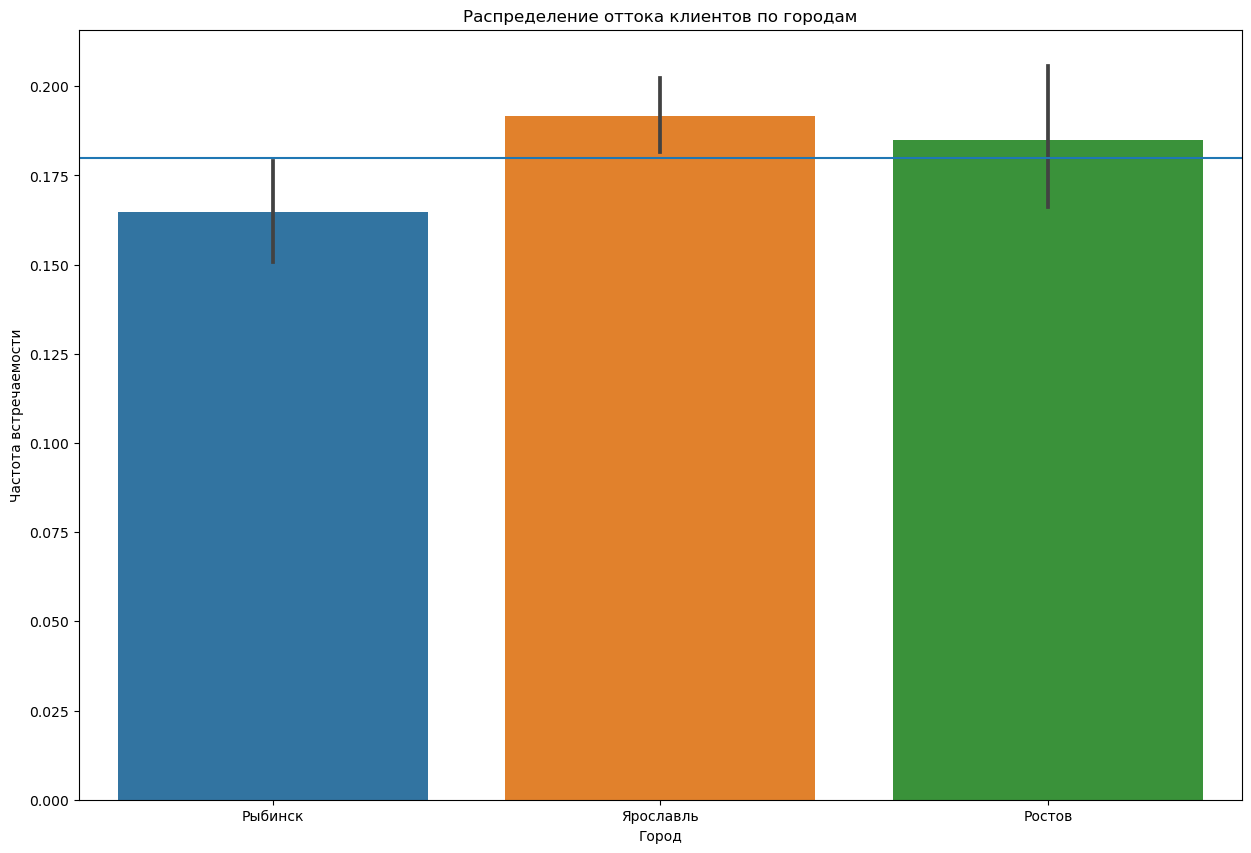

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=data, x='city', y='churn')
plt.title('Распределение оттока клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Частота встречаемости')
plt.axhline(churn_ratio)

В разрезе городов можно сделать вывод, что признак оттока наиболее характерен для клиентов из Ярославля - признак имеет более высокий показатель оттока, чем в среднем по банку. Также к отточности склонны клиенты из Ростова

#### Распределение оттока клиентов по полу

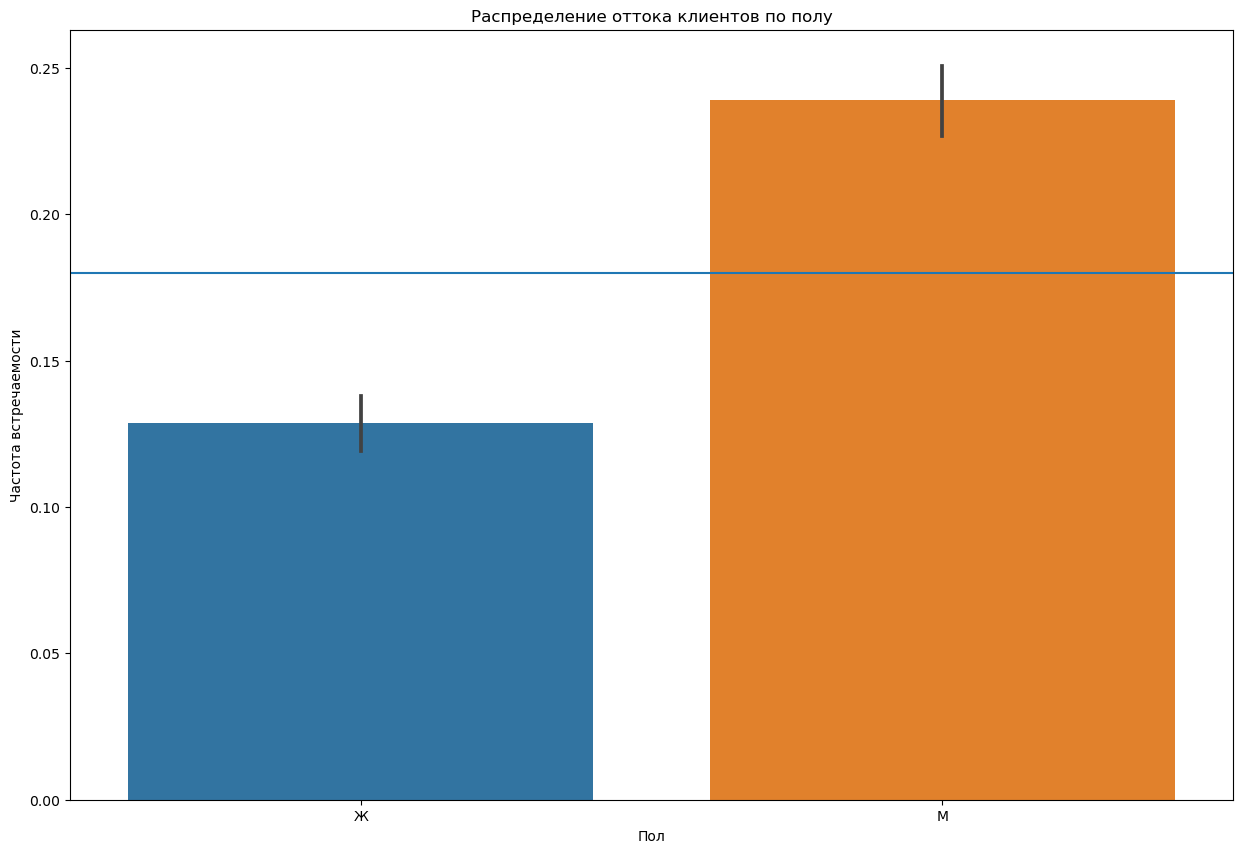

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=data, x='gender', y='churn')
plt.title('Распределение оттока клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Частота встречаемости')
plt.axhline(churn_ratio)

Мужской пол представляется признаком, серьезно влияющим на отток

#### Распределение оттока клиентов по количеству продуктов

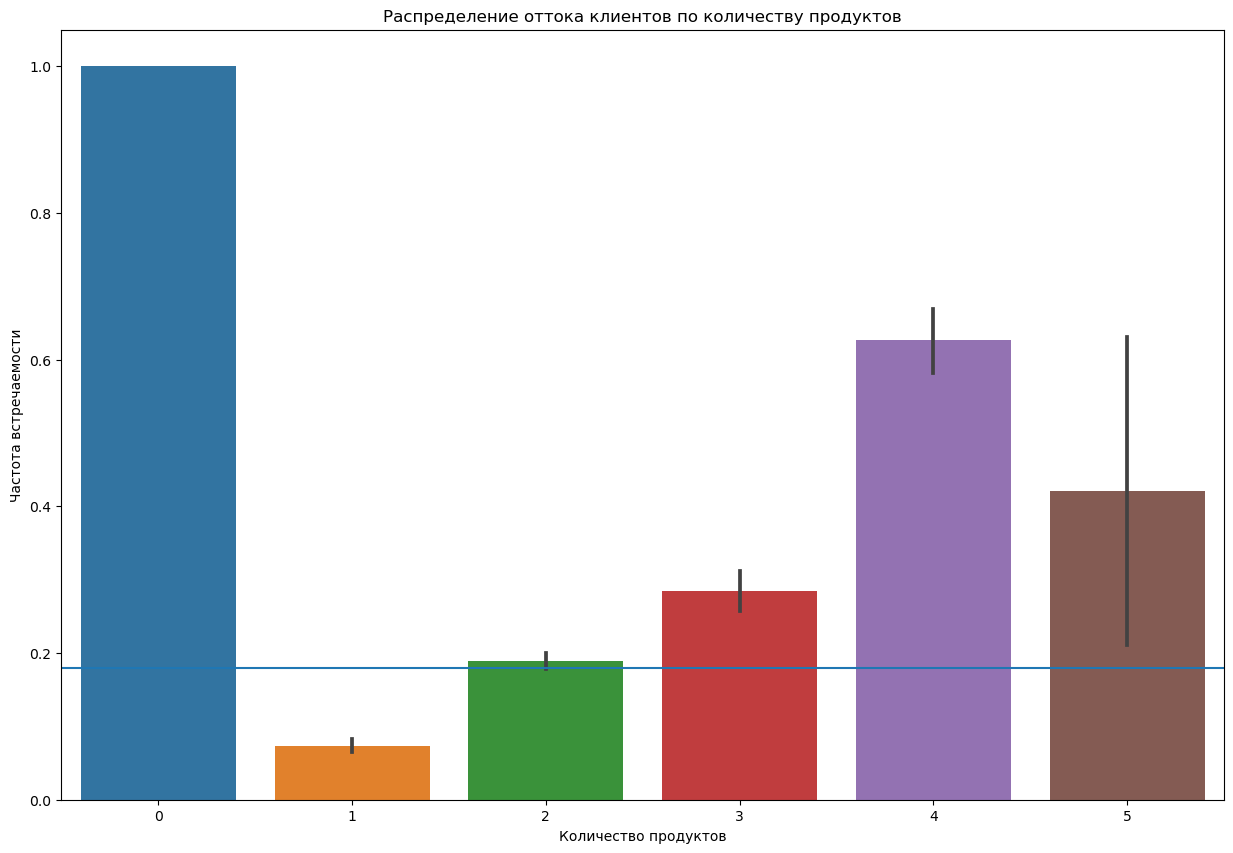

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=data, x='products', y='churn')
plt.title('Распределение оттока клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Частота встречаемости')
plt.axhline(churn_ratio)

In [43]:
data[data['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,user_city_Ростов,user_city_Рыбинск,user_city_Ярославль,user_gender_Ж,user_gender_М
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,False,True,False,True,False


Согласно графику отток, веротяен среди пользователей, не имеющих банковских продуктов, однако, вероятнее всего это аномалия, поскольку такая строка всего одна - женщина 79 лет из Рыбинска с пропуском данных в балансе. Вероятно, стоит пренебречь этой записью и построить график без ее учета. Построим обновленный график

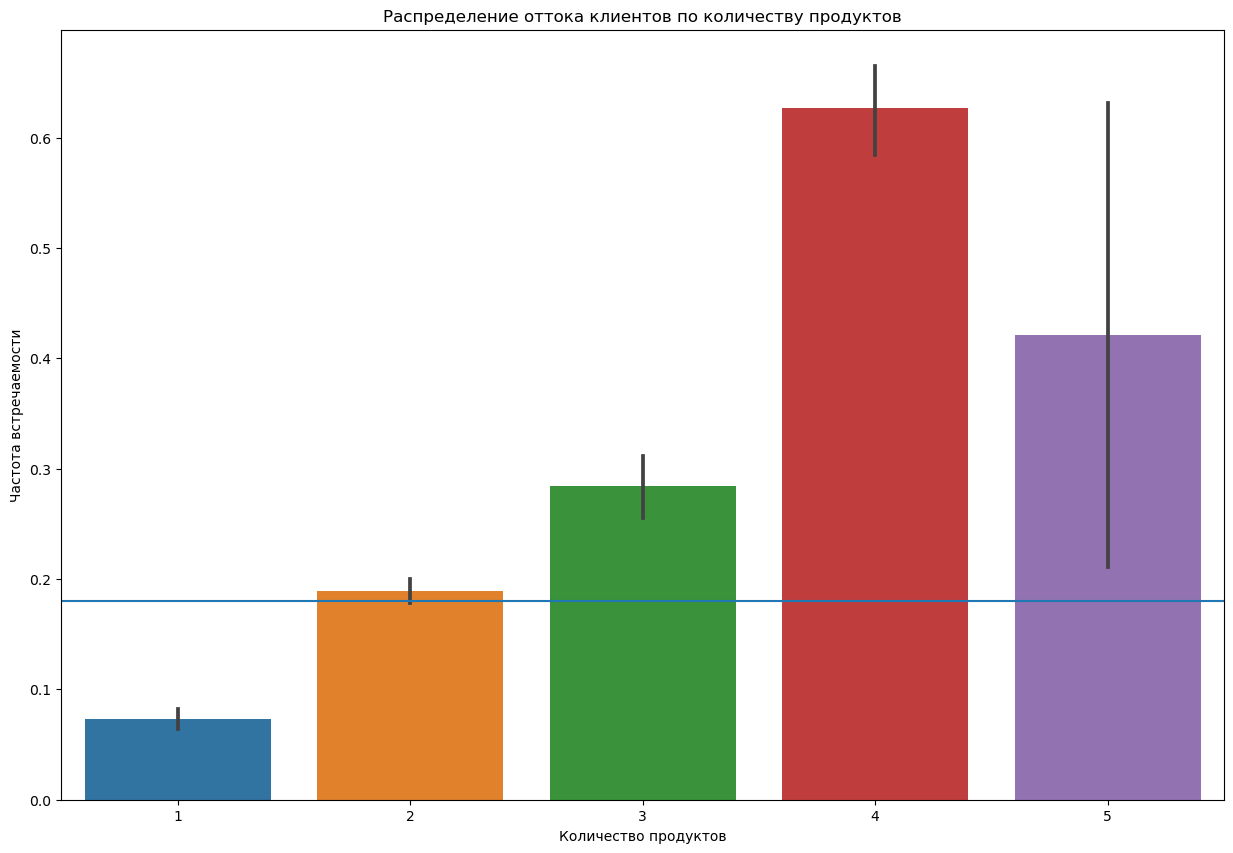

In [44]:
products = data.query('products != 0')
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=products, x='products', y='churn')
plt.title('Распределение оттока клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Частота встречаемости')
plt.axhline(churn_ratio)

Так, в значительной степени оттоку подвержены клиенты имеющие два или более банковских продуктов. Наиболее ярко выраженные тенденции к оттоку характерны для пользователей с 4 или 5 продуктами, в меньшей степени для клиентов с тремя и двумя 

#### Распределение оттока клиентов по наличию кредитной карты

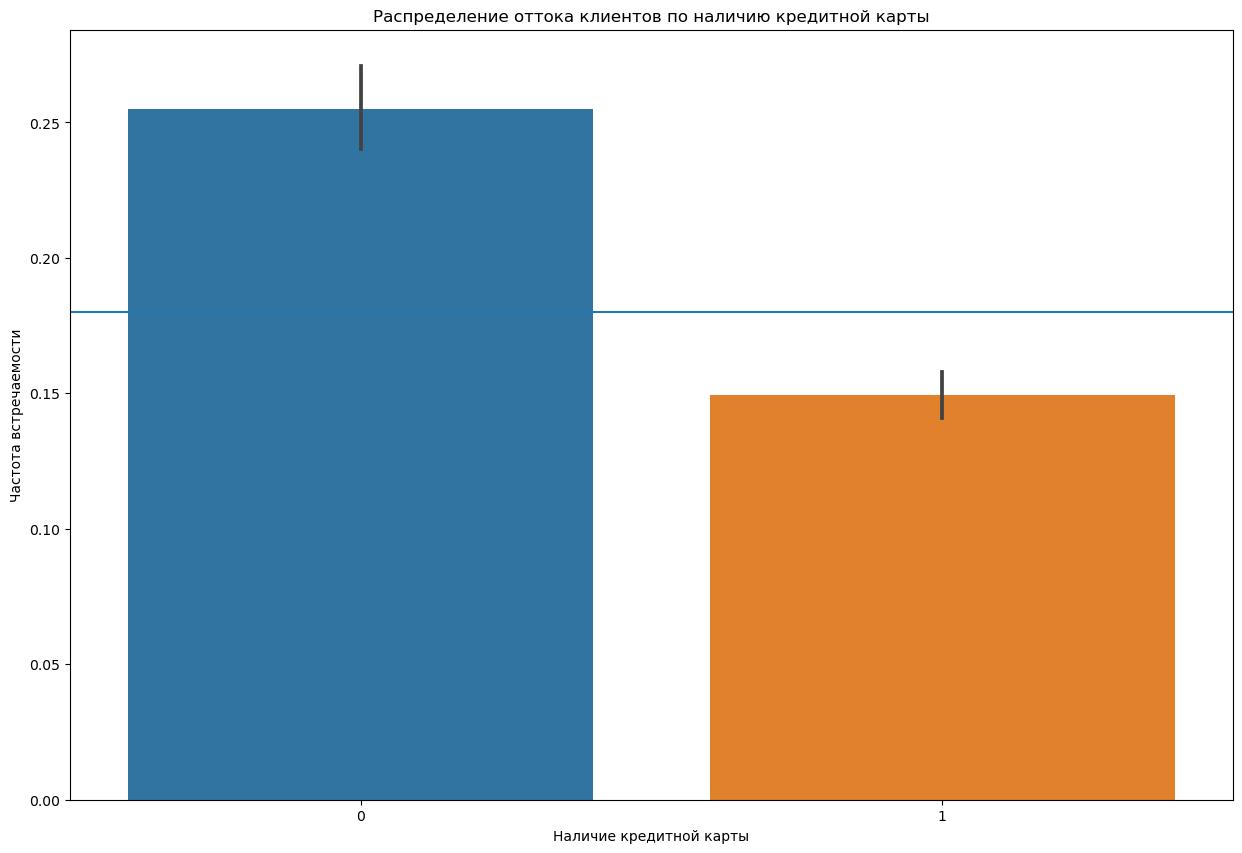

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=data, x='credit_card', y='churn')
plt.title('Распределение оттока клиентов по наличию кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Частота встречаемости')
plt.axhline(churn_ratio)

Отток более характерен для клиентов, не имеющих кредитной карты

#### Распределение оттока клиентов по активности

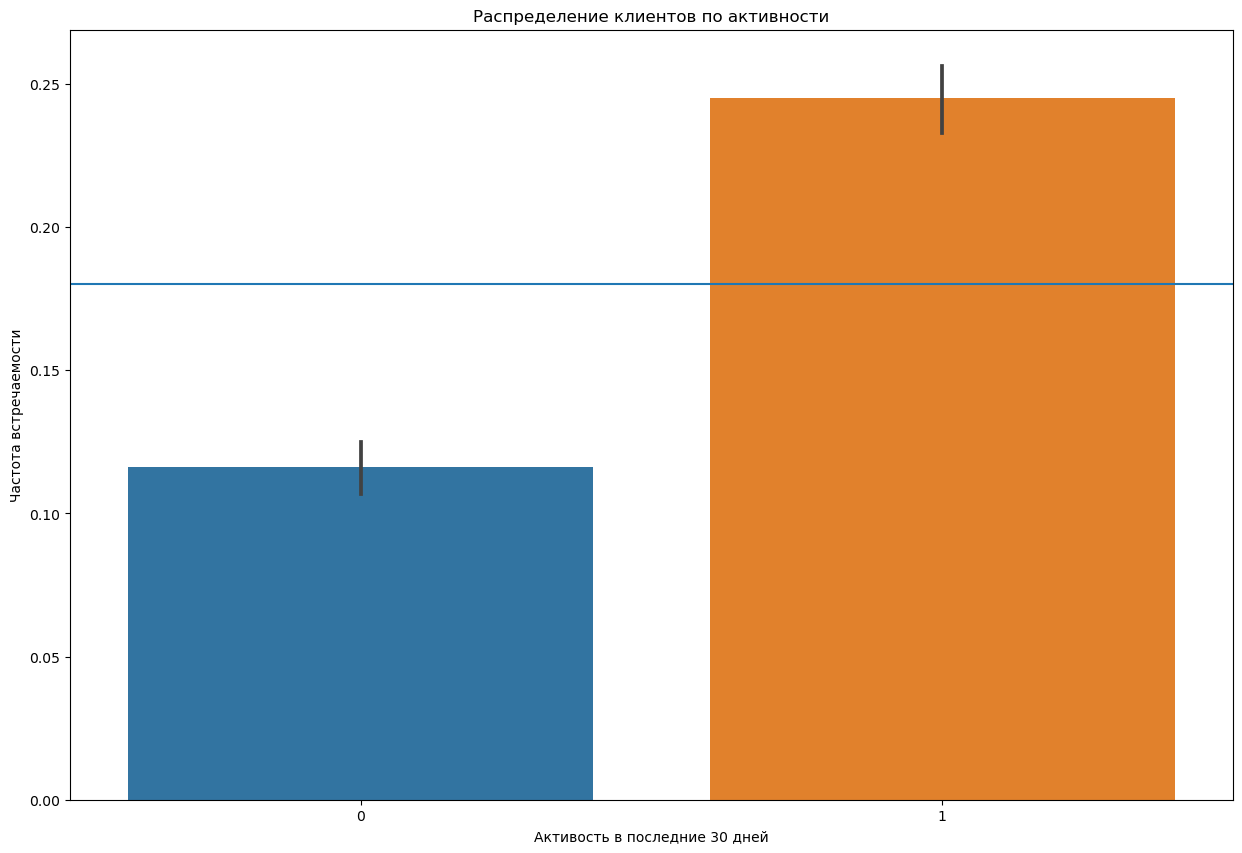

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=data, x='last_activity', y='churn')
plt.title('Распределение клиентов по активности')
plt.xlabel('Активость в последние 30 дней')
plt.ylabel('Частота встречаемости')
plt.axhline(churn_ratio)

Пользователи, которые не заходили в приложение банка и не проявляли другой активности имеют показатели оттока превышающие средние по банку

**К признакам, оказывающим значительное влияние на отток пользователей, исходя из построенных графиков можно отнести следующие категориальные признаки:**

Город - Ярославль или Ростов

Пол - мужской

Количество продуктов - от 2 до 5 

Отсутствие кредитной карты 

Отсутствие активности в последние 30 дней

### Корреляционный анализ и его интерпретация

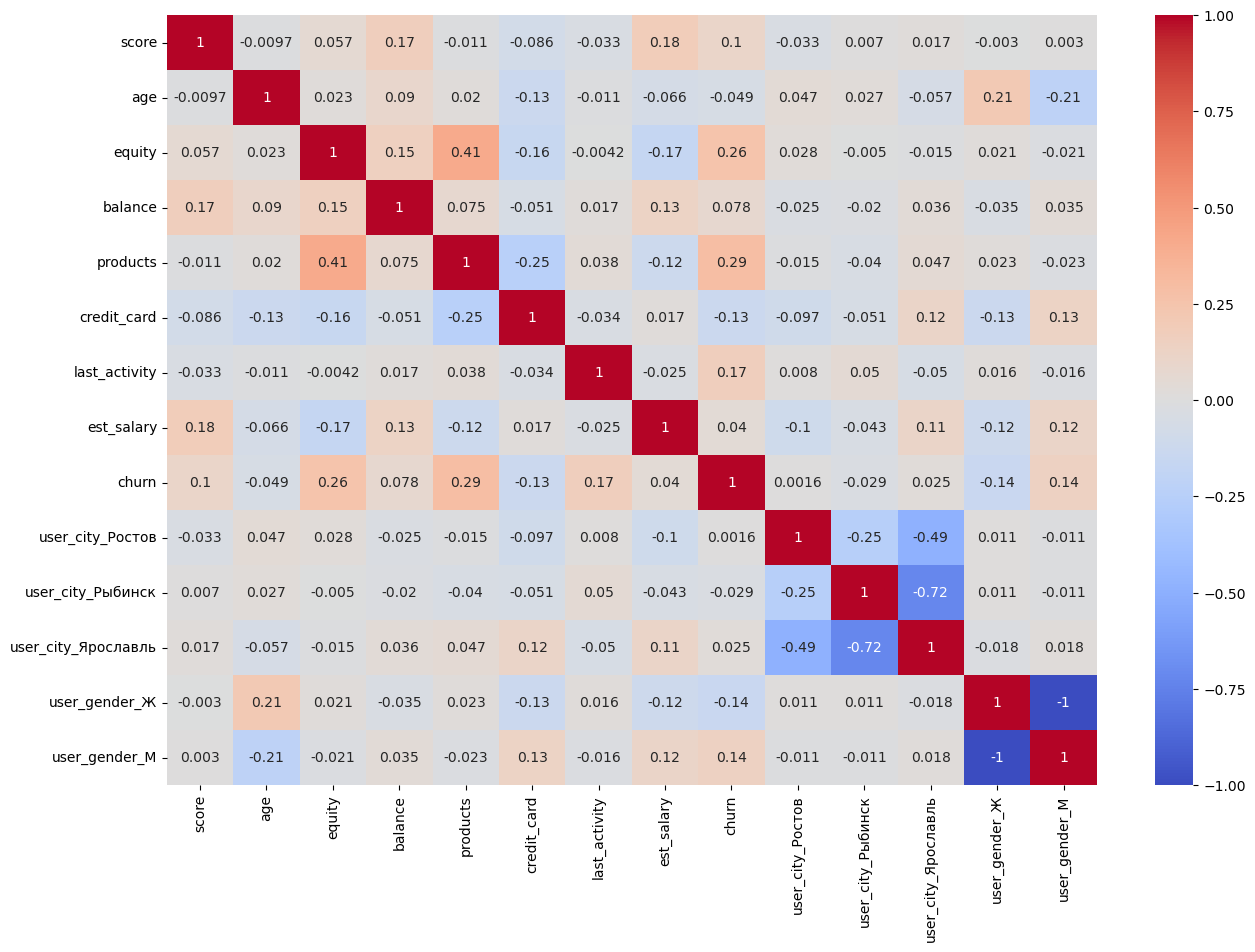

In [47]:
corr_2 = data.drop(['userid', 'city', 'gender'], axis=1).corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_2, cmap='coolwarm', center=0, annot=True)

Согласно шкале корреляции Чеддока ни один из признаков не превышает слабой зависимости с признаком оттока. Однако при условии, границы наличия влияния в 0.1 в рамках проекта, наиболее сильной корреляцией с оттоком обладают: 

количество продуктов - 0.29

баллы собствеености - 0.26

последняя активность - 0.17

мужской пол - 0.14

баллы скоринга - 0.10

##  Формирование и проверка статистических гипотез

### Гипотеза 1 - об уровне дохода лояльных и отточных пользователей 

Нулевая гипотеза - уровень дохода лояльных и отточных пользователей равен 

Альтернативная гипотеза - уровень дохода лояльных и отточных пользователей отличается

Необходимо провести проверку двусторонней гипотезы, однако перед этим необходимо дать обоснование инструментария. Для этого необходимо проверить нормальность распределения - это можно сделать с помощью критерия Шапиро-Уилка

In [48]:
alpha = 0.05 
results_1 = st.shapiro(data['est_salary'])
p_value = results_1[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Нет оснований отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.7176976445847175e-40
Отвергаем нулевую гипотезу: распределение не нормально


Из-за ненормальности распределения, использование t-теста не представляется целесообразным, следовательно для теста необходимо использовать критерий Манна-Уитни. Создадим две выборки для лояльных и отточных пользователей.

In [49]:
loyals = data.query('churn == 0')
loyals_est_salary = loyals['est_salary']
loyals_est_salary

1        86621.77
2       107683.34
5       156619.80
6       103838.32
7        68085.48
          ...    
9995     18943.64
9996    196898.29
9997    108905.09
9998     86874.90
9999     21422.37
Name: est_salary, Length: 7738, dtype: float64

In [50]:
churn = data.query('churn == 1')
churn_est_salary = churn['est_salary']
churn_est_salary

0        75719.14
3       174423.53
4        67353.16
12      112697.16
40       96242.71
          ...    
9981    227288.27
9986     83442.41
9987     63160.96
9992    133972.11
9994    102123.93
Name: est_salary, Length: 1737, dtype: float64

In [51]:
alpha = 0.05

results_2 = st.mannwhitneyu(loyals_est_salary, churn_est_salary)

print('p-значение: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  7.74860071247694e-06
Отвергаем нулевую гипотезу: разница статистически значима


По результатам теста, есть основания полагать, что существует разница между уровнем дохода отточных и лояльных пользователей 

### Гипотеза 2 - о возрасте среди лояльных и отточных клиентов

Нулевая гипотеза - возраст лояльных и отточных клиентов равен

Альтернативная гипотеза - возраст лояльных и отточных клиентов отличается

Проверим нормальность распределения с помощью критерия Шапиро-Уилка

In [52]:
alpha = 0.05 
results_3 = st.shapiro(data['age'])
p_value = results_3[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Нет оснований отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  8.407790785948902e-45
Отвергаем нулевую гипотезу: распределение не нормально


Необходимо использовать критерий Манна-Уитни. Создадим необходимые выборки

In [53]:
loyals_age = loyals['age']

In [54]:
churn_age = churn['age']

In [55]:
alpha = 0.05

results_3 = st.mannwhitneyu(loyals_age, churn_age)

print('p-значение: ', results_3.pvalue)

if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  1.2409031764885626e-05
Отвергаем нулевую гипотезу: разница статистически значима


Исходя из результатов теста, можно предположить, что имеются основания отвергнуть нулевую гипотезу, то есть есть разница между возрастом отточных и лояльных клиентов

## Подведение промежуточных итогов исследовательского и корреляционного анализа и анализа гипотез, выделение признаков, влияющих на отток клиентов 

**По результатам исследовательского анализа можно сделать следующие выводы:**

1. К признакам оттока можно отнести следующие интервалы непрерыных признаков:

    - Показатель скоринга в диапазоне от 830 до 940 очков

    - Возраст в диапазонах 25-35 и 50-60 лет

    - Количество баллов собственности в диапазоне от 4 и более

    - Состояние баланса в диапазонах от 750 тыс. до 2 млн.

    - Оценочный доход (от 90 тыс. до 220 тыс. если брать широко):

        - от 90 тыс. до 130 тыс.
        - от 150 тыс до 160 тыс.
        - от 170 тыс. до 220 тыс.
        - от 300 до 310 тыс
    
2. К признакам, оказывающим значительное влияние на отток пользователей, исходя из построенных графиков можно отнести следующие категориальные признаки:

    - Город - Ярославль или Ростов

    - Пол - мужской

    - Количество продуктов - от 2 до 5

    - Отсутствие кредитной карты

    - Отсутствие активности в последние 30 дней
    
    
3. **Корреляционный анализ показал, что, по шкале корреляции Чеддока, ни один из признаков не превышает слабой зависимости с признаком оттока. Однако наиболее сильной корреляцией с оттоком обладают:**

    - количество продуктов - 29%

    - баллы собственности - 26%

    - последняя активность - 17%

    - мужской пол - 14%

    - баллы скоринга - 10%

**Из анализа гипотез были сделаны выводы о том, что между уровнем дохода и возрастом лояльных и отточных клиентов есть разница.**


## Сегментация клиентов банка на группы и приоритизация сегментов

### Средний отток по банку 

Перед тем, как представлять сегментацию клиентов по группам, подсчитаем средний уровень оттока по банку. 

In [56]:
round(churn['userid'].count() / loyals['userid'].count(), 2)

0.22

**Предлагается приоритизировать сегменты по мере убывания отточных клиентов**

### Сегмент 1 

Первый сегмент клиентов банка, подверженных высокому риску оттока, составили клиенты, не входившие в приложение банка и не проявлявшие другой активности в течение тридцати дней, имеющие показатели скоринга в диапазоне от 830 до 940. 

Общее число таких пользователей составило 2670 человека, из которых 922 стали отточными - 35% в относительных значениях.

In [57]:
segment_1 = data.query('last_activity == 1')
segment_1 = segment_1.query('830 <= score <= 940') 
segment_1['userid'].count()

2670

In [58]:
seg_1 = segment_1.query('churn == 1')
seg_1['userid'].count()

922

In [59]:
round(seg_1['userid'].count() / segment_1['userid'].count(), 2)

0.35

### Сегмент 2

Второй сегмент сформировали клиенты банка, имеющие на счету более 750 тыс. и являющиеся держателями более 1 продукта банка. 

Их общее число составило 2231 человека, число отточных клиентов среди них - 818 человека, то есть 37% в относительных значениях. 

In [60]:
total_segment_2 =  data.query('balance >= 750000') 
total_segment_2 = total_segment_2.query('products > 1')
total_segment_2['userid'].count()

2231

In [61]:
seg_2 = total_segment_2.query('churn == 1')
seg_2['userid'].count()

818

In [62]:
round(seg_2['userid'].count() / total_segment_2['userid'].count(), 2)

0.37

### Сегмент 3

В третий сегмент вошли мужчины с оценочным доходом в 90 тыс. или более.

Общее число таких клиентов составило 3222 человека, отточных среди них 781 - 24% в относительных значениях.

In [63]:
total_segment_3 = data.query('gender == "М"')
total_segment_3 = total_segment_3.query('est_salary >= 90000')
total_segment_3['userid'].count()

3222

In [64]:
seg_3 = total_segment_3.query('churn == 1')
seg_3['userid'].count()

781

In [65]:
round(seg_3['userid'].count() / total_segment_3['userid'].count(), 2)

0.24

### Сегмент 4

В четвертый сегмент клиентов, подверженных оттоку вошли мужчины, имеющие показатели скоринга в диапазоне от 830 до 940 очков.

Общее их число составило 2598 человек, отточных из них - 761 человек - 24%

In [66]:
total_segment_4 = data.query('830 <= score <= 940')
total_segment_4  = total_segment_4.query('gender == "М"')
total_segment_4['userid'].count() 

2598

In [67]:
seg_4 = total_segment_4.query('churn == 1')
seg_4['userid'].count() 

761

In [68]:
round(seg_3['userid'].count() / total_segment_3['userid'].count(), 2)

0.24

## Приоритизация сегментов

Предлагается следующая приоритизация сегментов:

- Сегмент 1 - включающий клиентов, не входивших в приложение банка и не проявлявших другой активности в течение тридцати дней и имеющих показатели скоринга в диапазоне от 830 до 940. - отток 922 человека

- Сегмент 2 - с клиентами, имеющими на счету более 750 тыс. и являющимися держателями более 1 продукта банка - отток 818 человек

- Сегмент 3 - сегмент, включающий мужчин с оценочным доходом в 90 тыс. или более - отток - 781 

- Сегмент 4 - сегмент, сформированныый из мужчин с показателями скоринга в диапазоне от 830 до 940 очков - отток 761 человек.

В основе приоритизации сегментов - количество убывающих клиентов, в первую очередь стоит обратить внимание на те, сегменты, где их число больше.

## Формирование итоговых выводов и таргетированных рекомендаций по работе с сегментами с наиболее высоким риском оттока

Клиентам из первого сегмента (неактивным пользователям с показателями скоринга от 830 до 940) можно сделать предложение, связанное с кредитной картой на выгодных условиях, например, с льготным периодом или низким процентом на покупки у партнеров банка.

Рекомендацией для клиентов второго сегмента (имеющих на счету более 750 тыс. и  являющиеся держателями более 1 продукта банка) - может стать повышение процента на остаток на счете, предложение об открытии накопительного счета с выскоим процентом и дополнительные скидки и привилегии при использовании различных банковских продуктов.

Пользователям третьего сегмента (мужчинам с оценочным доходом в 90 тыс. и более) можно предложить повышенный кэшбек на любимые категории покупок или сделать предложение об открытии инвестиционного счета с консультацией и приветственным бонусом. 

Рекомендацией для клиентов четвертого сегмента (мужчинам с показателями скоринга от 830 до 940) может стать увеличение кредитного лимита, снижение процентной ставки по кредитам и займам или предложение о реструктуризации кредита другого банка.

## Презентация результатов: 
Ссылка на презентацию в формате PDF: https://disk.yandex.ru/i/_YZFALEypYtiAw